<a href="https://colab.research.google.com/github/AbeerRafique/Data-Science-Projects-/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Provide the correct file path (update the path based on your Drive location)
file_path = "/content/drive/My Drive/Telco_Customer_Churn.csv"

# Load the dataset
telecom_cust = pd.read_csv(file_path)

# Data preprocessing
# Fill missing values in 'TotalCharges' and convert to numeric
telecom_cust['TotalCharges'] = pd.to_numeric(telecom_cust['TotalCharges'], errors='coerce')
telecom_cust['TotalCharges'].fillna(0, inplace=True)

# Convert 'Churn' to binary labels
label_encoder = LabelEncoder()
telecom_cust['Churn'] = label_encoder.fit_transform(telecom_cust['Churn'])

# Use Label Encoding for 'InternetService' and 'Contract'
telecom_cust['InternetService'] = label_encoder.fit_transform(telecom_cust['InternetService'])
telecom_cust['Contract'] = label_encoder.fit_transform(telecom_cust['Contract'])

# Select features
selected_features = ['tenure', 'InternetService', 'Contract', 'MonthlyCharges', 'TotalCharges']
X = telecom_cust[selected_features]
y = telecom_cust['Churn']

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=101)
model.fit(X, y)

# Save the trained model to Google Drive
model_path = "/content/drive/My Drive/random_forest_model.joblib"
dump(model, model_path)

print(f"Model saved successfully at: {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-18-e139ef7f80a1>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_cust['TotalCharges'].fillna(0, inplace=True)


Model saved successfully at: /content/drive/My Drive/random_forest_model.joblib


<ipython-input-19-5d0665c02f66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_cust['Churn'], palette='coolwarm')


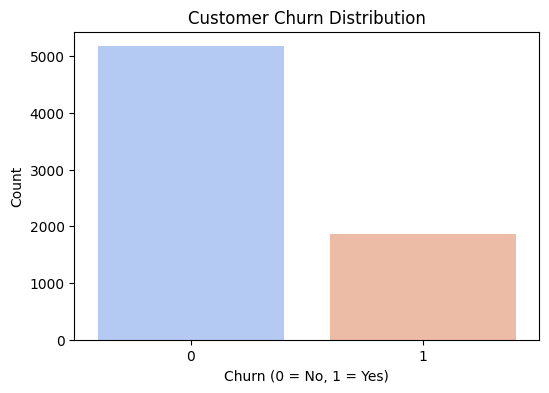

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=telecom_cust['Churn'], palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


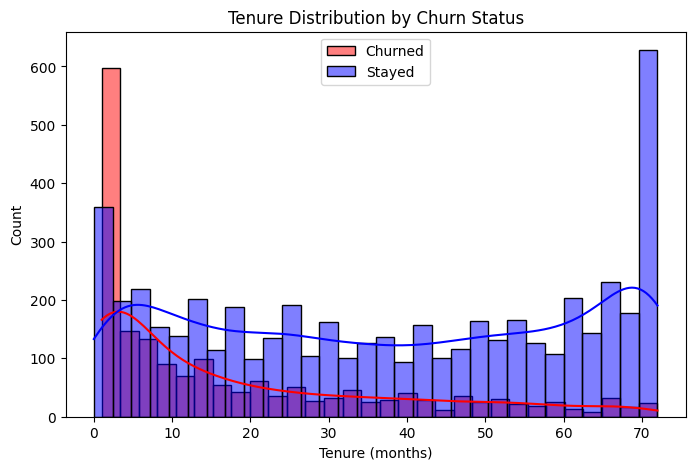

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(telecom_cust[telecom_cust['Churn'] == 1]['tenure'], bins=30, kde=True, color='red', label="Churned")
sns.histplot(telecom_cust[telecom_cust['Churn'] == 0]['tenure'], bins=30, kde=True, color='blue', label="Stayed")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.legend()
plt.show()


<ipython-input-21-73269f89aeaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom_cust, palette='coolwarm')


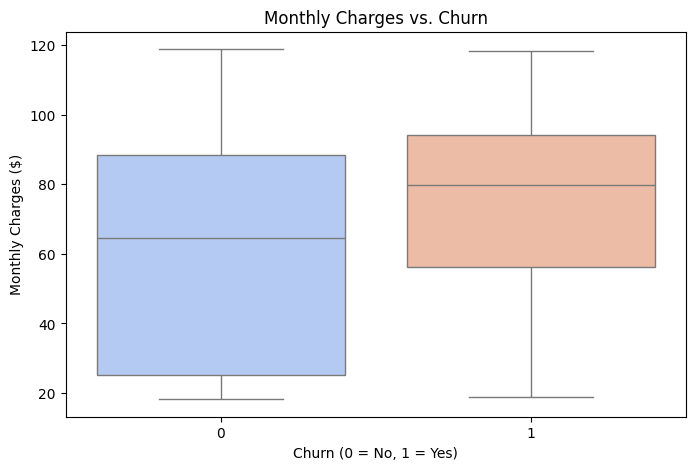

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom_cust, palette='coolwarm')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges ($)')
plt.show()


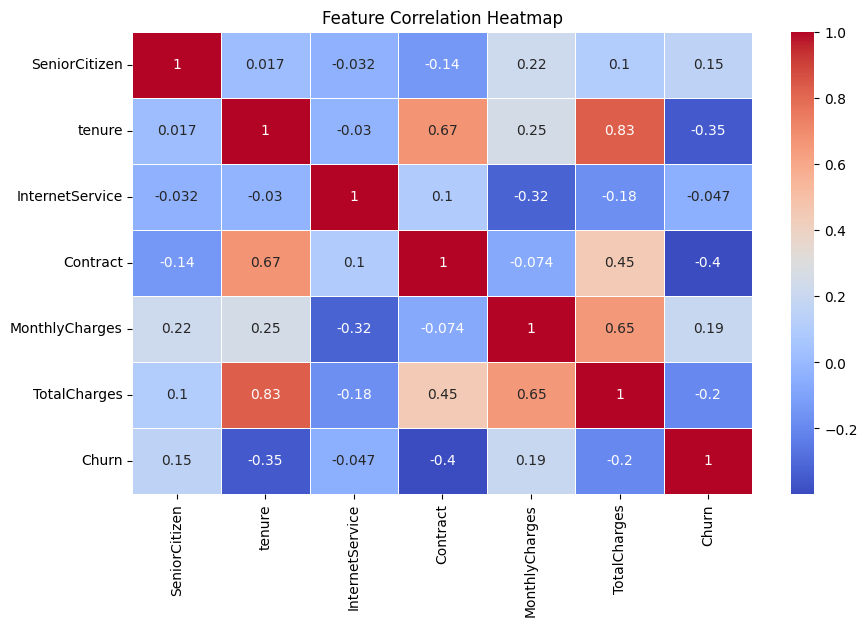

In [24]:
plt.figure(figsize=(10, 6))
# Select only numeric features for correlation calculation
numeric_features = telecom_cust.select_dtypes(include=['number'])
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

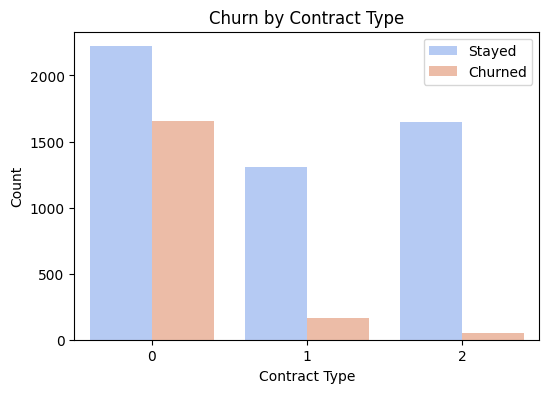

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x=telecom_cust['Contract'], hue=telecom_cust['Churn'], palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(['Stayed', 'Churned'])
plt.show()


## **Customer Churn Analysis - Key Findings**

### **1. Churn Distribution**
- A significantly larger number of customers do not churn compared to those who do.
- However, a notable percentage of customers still leave, indicating room for retention strategies.

### **2. Tenure and Churn Relationship**
- Customers with **shorter tenure (0-10 months) are more likely to churn**.
- Customers with **long tenure (60+ months) have the lowest churn rate**.
- Early-stage customers need better engagement to **reduce early churn**.

### **3. Monthly Charges and Churn**
- Customers who churn tend to have **higher monthly charges** on average.
- The company may need to **re-evaluate pricing strategies, offer discounts, or loyalty incentives** to prevent high-value customers from leaving.

### **4. Feature Correlation Insights**
- **Negative correlation between tenure and churn (-0.35):** Longer-tenured customers are **less likely to churn**.
- **Strong negative correlation between contract type and churn (-0.40):** Customers with **longer contracts** are more likely to stay.
- **Positive correlation between monthly charges and churn (0.19):** Higher charges **increase churn probability** slightly.

### **5. Contract Type and Churn**
- Customers with **month-to-month contracts have the highest churn rate**.
- Customers on **long-term contracts (1-year, 2-year)** have significantly lower churn.
- Encouraging long-term contracts can **reduce churn rates**.

### **Recommendations for the Company**
1. **Focus on customer retention in the first few months** with onboarding incentives, proactive support, and engagement programs.
2. **Reduce churn among high-paying customers** by offering loyalty discounts or bundling services to **increase perceived value**.
3. **Encourage longer contracts** through attractive pricing plans or added benefits.
4. **Reassess pricing strategy** to ensure affordability without compromising service quality.
5. **Target month-to-month contract users** with personalized offers to encourage contract upgrades.

### **Conclusion**
Implementing these strategies can **significantly reduce customer churn** and improve overall business performance.
